# Exercise w/ PyTorch
### Author: Ho Kyung Sung

#### Assignment spec: (date: May 22 2019)
(i) Generate a dataset as follows: sample 10000 points from N(0, 1) as inputs (x). Define outputs (y) as y = 5x^3 + 10. Reserve 80% of the dataset for training and save 20% for evaluation.

(ii) train a linear regression model (built in PyTorch!) using gradient descent on the training dataset. Evaluate on the reserved 20%. How does your model perform on training and evaluation data? (compute the mean squared error between predicted y and true y). 

(iii) Add more layers and some nonlinearities to your linear regression model (nn.TanH lets say). Compute training and evaluation performance again. What happens?

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [2]:
# Function for printing evaluation stats
def print_result(x_eval, y_eval, model):
    predicted = model.forward(torch.from_numpy(x_eval).unsqueeze(1)).data.numpy()
    print(predicted.shape)

    y_eval = np.expand_dims(y_eval, 1)
    final_loss = np.mean(np.square(y_eval - predicted))
    final_loss2 = criterion(torch.from_numpy(predicted), torch.from_numpy(y_eval)).data.numpy()
    print(final_loss)
    print(final_loss2)
    
    plt.plot(x_eval, y_eval, 'o', label = 'from data', alpha = 0.5)
    plt.plot(x_eval, predicted[:, 0], '--', label = 'prediction', alpha = 0.5)
    plt.legend()
    plt.show()
    print(model_ln.state_dict())

>(i) Generate dataset

In [3]:
# (i) Generate dataset
n_data = 10000
training_cutoff = n_data * 4 // 5

mu, sigma = 0, 1
x = (sigma * np.random.randn(n_data) + mu).astype(np.float32)
y = 5*(x**3) + 10

In [4]:
# (ii) Train linear regression model
# Create linear regression model
class LinearRegressionModel(torch.nn.Module):

    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__() 
        # Single linear layer
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        predict = self.linear(x)
        return predict

>(ii) Linear Regression

In [5]:
# Create instance of model
in_dim = 1
out_dim = 1
model_ln = LinearRegressionModel(in_dim, out_dim)

# Mean squared loss
criterion = torch.nn.MSELoss()
# define eta
l_rate = 0.01
# Training model is stochastic gradient descent
optimizer = torch.optim.SGD(model_ln.parameters(), lr = l_rate)

In [6]:
x_train = torch.from_numpy(x[:training_cutoff]).unsqueeze(1)
y_train = torch.from_numpy(y[:training_cutoff]).unsqueeze(1)

epochs = 300
for epoch in range(epochs):
    inputs = x_train
    labels = y_train

    optimizer.zero_grad()
    outputs = model_ln.forward(inputs)
    
    loss = criterion(outputs, labels)
    loss.backward()# back props
    
    # Q: how to stop after plateauing?
    
    # update the parameters
    optimizer.step()
    
    if (epoch % 10 == 0): print('training epoch {}, loss {}'.format(epoch, loss.data))

training epoch 0, loss 498.2364807128906
training epoch 10, loss 382.6518859863281
training epoch 20, loss 305.24542236328125
training epoch 30, loss 253.4066162109375
training epoch 40, loss 218.6902618408203
training epoch 50, loss 195.44076538085938
training epoch 60, loss 179.87057495117188
training epoch 70, loss 169.44317626953125
training epoch 80, loss 162.45993041992188
training epoch 90, loss 157.78321838378906
training epoch 100, loss 154.65121459960938
training epoch 110, loss 152.55368041992188
training epoch 120, loss 151.14894104003906
training epoch 130, loss 150.20819091796875
training epoch 140, loss 149.57815551757812
training epoch 150, loss 149.1562042236328
training epoch 160, loss 148.87362670898438
training epoch 170, loss 148.6843719482422
training epoch 180, loss 148.55763244628906
training epoch 190, loss 148.47274780273438
training epoch 200, loss 148.4158935546875
training epoch 210, loss 148.37782287597656
training epoch 220, loss 148.35232543945312
traini

(2000, 1)
120.187706
120.1877


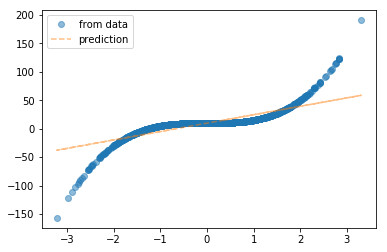

OrderedDict([('linear.weight', tensor([[14.7962]])), ('linear.bias', tensor([9.7992]))])


In [7]:
# Evaluate Linear Model
x_eval = x[training_cutoff:]
y_eval = y[training_cutoff:]
print_result(x_eval, y_eval, model_ln)

>(iii) Add non-linear layers (nn.TanH)

In [8]:
# iii) Add non-linear layers (nn.TanH)
# Create neural regression model
class NeuralRegressionModel(torch.nn.Module):

    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralRegressionModel, self).__init__() 
        # Single linear layer
        self.hidden = torch.nn.Linear(input_dim, hidden_dim)    # hidden layer
        self.tanH = torch.nn.Hardtanh()                         # non-linear layer
        self.linear = torch.nn.Linear(hidden_dim, output_dim)   # linear output layer
        

    def forward(self, x):
        x = self.hidden(x)
        x = self.tanH(x)               # activation function for hidden layer
        x = self.linear(x)             # linear output
        return x

In [9]:
# Create instance of model
model_tanH = NeuralRegressionModel(input_dim=1, hidden_dim=100, output_dim=1)

# Mean squared loss
criterion = torch.nn.MSELoss()
# define eta
l_rate = 0.01
# Training model is stochastic gradient descent
optimizer = torch.optim.SGD(model_tanH.parameters(), lr = l_rate)

In [10]:
epochs = 2000
for epoch in range(epochs):
    inputs = x_train
    labels = y_train

    optimizer.zero_grad()
    outputs = model_tanH.forward(inputs)
    
    loss = criterion(outputs, labels)
    loss.backward()# back props
    
    # update the parameters
    optimizer.step()
    
    if (epoch % 50 == 0): print('training epoch {}, loss {}'.format(epoch, loss.data))

training epoch 0, loss 441.792724609375
training epoch 50, loss 131.48590087890625
training epoch 100, loss 80.41474151611328
training epoch 150, loss 54.58200454711914
training epoch 200, loss 41.15949630737305
training epoch 250, loss 105.91717529296875
training epoch 300, loss 29.071874618530273
training epoch 350, loss 26.81875228881836
training epoch 400, loss 52.121124267578125
training epoch 450, loss 22.233802795410156
training epoch 500, loss 21.559633255004883
training epoch 550, loss 32.523799896240234
training epoch 600, loss 25.602048873901367
training epoch 650, loss 20.233325958251953
training epoch 700, loss 20.721628189086914
training epoch 750, loss 21.832931518554688
training epoch 800, loss 19.804353713989258
training epoch 850, loss 18.396257400512695
training epoch 900, loss 18.588821411132812
training epoch 950, loss 17.565176010131836
training epoch 1000, loss 16.75926971435547
training epoch 1050, loss 16.314088821411133
training epoch 1100, loss 15.50006961822

In [12]:
x_eval

array([-0.66277856, -1.7461975 , -1.6619648 , ..., -0.05355509,
       -0.23797768,  0.3065061 ], dtype=float32)

(2000, 1)
5.8073697
5.8073697


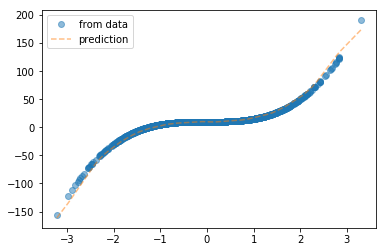

OrderedDict([('linear.weight', tensor([[14.7962]])), ('linear.bias', tensor([9.7992]))])


In [13]:
# Evalutate non-linear neural network on test set
x_eval = x[training_cutoff:]
y_eval = y[training_cutoff:]
order = np.argsort(x_eval)
print_result(x_eval[order], y_eval[order], model_tanH)

#### Assignment spec: (date: May 31 2019)
1. To measure overfitting, take your trained model and sample points from N(3, 1) and N(-3, 1). Compare your model’s predictions to the true answer. You should see that the MSE is much higher than within the N(0, 1) range.

2. Add some form of regularization to your model. Retrain and try to do (1) again. You should see much better MSE.

>1. test new dataset out of range

In [14]:
# New dataset
n_new_data = 500

mu, sigma = 3, 1
x_new1 = (sigma * np.random.randn(n_new_data) + mu).astype(np.float32)
y_new1 = 5*(x_new1**3) + 10

mu, sigma = -3, 1
x_new2 = (sigma * np.random.randn(n_new_data) + mu).astype(np.float32)
y_new2 = 5*(x_new2**3) + 10

x_new = np.concatenate((x_new1, x_new2))
y_new = np.concatenate((y_new1, y_new2))

(1000, 1)
17845.07
17845.07


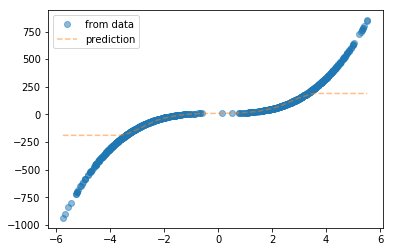

OrderedDict([('linear.weight', tensor([[14.7962]])), ('linear.bias', tensor([9.7992]))])


In [16]:
# Evaluate original model for N(0,1) on unseen dataset
x_eval = x_new
y_eval = y_new
order = np.argsort(x_eval)
print_result(x_eval[order], y_eval[order], model_tanH)

>2. Train model with regularization penalties

In [23]:
# Create neural regression model with regularization penalties
class Neural_Model_Reg(torch.nn.Module):

    def __init__(self, input_dim, hidden_dim, output_dim, dropout=0.2):
        super(Neural_Model_Reg, self).__init__() 
        # Single linear layer
        self.hidden = torch.nn.Linear(input_dim, hidden_dim)    # hidden layer
        self.tanH = torch.nn.Hardtanh()                         # non-linear layer
        self.linear = torch.nn.Linear(hidden_dim, output_dim)   # linear output layer
        self.dropout = torch.nn.Dropout(dropout)

    def forward(self, x):
        x = self.hidden(x)
        x = self.tanH(x)               # activation function for hidden layer
        x = self.dropout(x)
        x = self.linear(x)             # linear output
        return x

In [24]:
# Create instance of model
model_tanH_reg = Neural_Model_Reg(input_dim=1, hidden_dim=50, output_dim=1)

# Mean squared loss
criterion = torch.nn.MSELoss()
# define eta
l_rate = 0.01
# ADDED L2 penalty
wt_decay = 0.01

# Training model is stochastic gradient descent
optimizer = torch.optim.SGD(model_tanH_reg.parameters(), lr = l_rate, momentum = 0, weight_decay = wt_decay)

In [27]:
epochs = 10000
for epoch in range(epochs):
    inputs = x_train
    labels = y_train

    optimizer.zero_grad()
    outputs = model_tanH_reg.forward(inputs)
    
    loss = criterion(outputs, labels)
    loss.backward()# back props
    
    # update the parameters
    optimizer.step()
    
    if (epoch % 50 == 0): print('training epoch {}, loss {}'.format(epoch, loss.data))

training epoch 0, loss 77.06063079833984
training epoch 50, loss 80.95384216308594
training epoch 100, loss 78.6331787109375
training epoch 150, loss 80.5313720703125
training epoch 200, loss 78.28485870361328
training epoch 250, loss 80.72695922851562
training epoch 300, loss 79.98741149902344
training epoch 350, loss 78.18797302246094
training epoch 400, loss 79.00597381591797
training epoch 450, loss 80.23674011230469
training epoch 500, loss 82.38011932373047
training epoch 550, loss 79.5477523803711
training epoch 600, loss 76.5388412475586
training epoch 650, loss 75.757080078125
training epoch 700, loss 79.7393798828125
training epoch 750, loss 75.24881744384766
training epoch 800, loss 88.79426574707031
training epoch 850, loss 75.60902404785156
training epoch 900, loss 84.17298126220703
training epoch 950, loss 75.84988403320312
training epoch 1000, loss 77.45575714111328
training epoch 1050, loss 85.56890869140625
training epoch 1100, loss 81.58200073242188
training epoch 115

training epoch 9450, loss 84.36799621582031
training epoch 9500, loss 75.8155517578125
training epoch 9550, loss 76.16896057128906
training epoch 9600, loss 82.8597640991211
training epoch 9650, loss 75.09366607666016
training epoch 9700, loss 84.70690155029297
training epoch 9750, loss 79.2269058227539
training epoch 9800, loss 78.06107330322266
training epoch 9850, loss 73.7588882446289
training epoch 9900, loss 78.26043701171875
training epoch 9950, loss 79.55318450927734


(2000, 1)
28.105057
28.105055


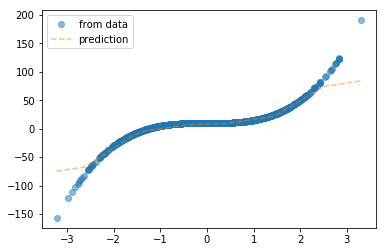

OrderedDict([('linear.weight', tensor([[14.7962]])), ('linear.bias', tensor([9.7992]))])


In [28]:
# Evalutate non-linear neural network on test set
model_tanH_reg.eval()
x_eval = x[training_cutoff:]
y_eval = y[training_cutoff:]
order = np.argsort(x_eval)
print_result(x_eval[order], y_eval[order], model_tanH_reg)

(1000, 1)
35767.45
35767.445


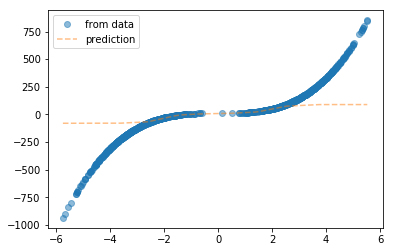

OrderedDict([('linear.weight', tensor([[14.7962]])), ('linear.bias', tensor([9.7992]))])


In [29]:
# Evaluate new regularized model for N(0,1) on unseen dataset
x_eval = x_new
y_eval = y_new
order = np.argsort(x_eval)
print_result(x_eval[order], y_eval[order], model_tanH_reg)

### Questions:
* Regularization doesn't seem to help generalization?
* Way to stop after plateuing to a degree?
* Unsure what the prediction plot is showing -- why are there multiple lines, instead of a curve?